In [1]:
from BatchAgglomerate3D import BatchAgglomerate3D, TREE_SCORE_OPTIONS
from data_utils import read_data
from metric_utils import *
import pandas as pd
import seaborn as sns
import numpy as np
pd.options.display.width = 0

In [5]:
data = read_data(['mouse'])
agglomerate = BatchAgglomerate3D(
    cell_type_affinity=[spearmanr_connectivity],
    linkage_cell=['complete'],
    linkage_region=['homolog_avg'],
    max_region_diff=[0, 1],
    region_dist_scale=np.arange(0.1, 3, 0.01),
    verbose=False
)

agglomerate.agglomerate(data)
all_scores = agglomerate.get_all_scores()

100%|██████████| 580/580 [00:08<00:00, 65.61it/s]


In [6]:
all_scores

,linkage_cell,linkage_region,max_region_diff,region_dist_scale,score metric,score
0,complete,homolog_avg,0,0.15,ME,7.167663
1,complete,homolog_avg,0,0.15,BME,5.342813
2,complete,homolog_avg,0,0.15,MP,8.000000
3,complete,homolog_avg,0,0.13,ME,7.167663
4,complete,homolog_avg,0,0.13,BME,5.342813
...,...,...,...,...,...,...
1735,complete,homolog_avg,1,2.99,BME,4.925282
1736,complete,homolog_avg,1,2.99,MP,14.000000
1737,complete,homolog_avg,1,2.98,ME,11.001096
1738,complete,homolog_avg,1,2.98,BME,4.925282


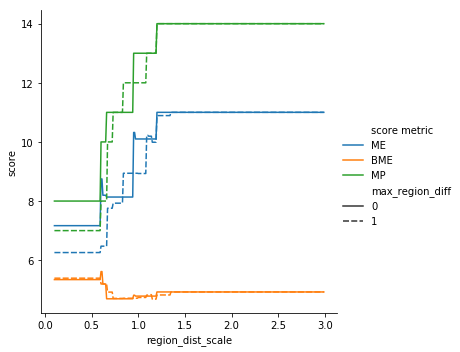

In [8]:
sns.relplot(data=all_scores, x='region_dist_scale', y='score', hue='score metric', kind='line', style='max_region_diff')